In [1]:
import panhumanpy as ph
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import pooch
from scipy.sparse import csr_matrix
from scipy.io import mmwrite
import re
import anndata
import scanpy.external as sce
import scvi
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import gseapy as gp
from gseapy.plot import dotplot
import math

2025-08-26 22:46:22.042037: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 22:46:22.058206: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-08-26 22:46:22.075492: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-08-26 22:46:22.081043: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 22:46:22.093840: I tensorflow/core/platform/cpu_feature_guar

In [2]:
KPMP_SN_raw=sc.read('/scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/kpmp-sn-rnaseq.h5ad')


In [6]:
print(KPMP_SN_raw.var.columns)

Index(['feature_is_filtered', 'feature_name', 'feature_reference',
       'feature_biotype', 'feature_length'],
      dtype='object')


In [27]:
KPMP_SN_raw

AnnData object with n_obs × n_vars = 304989 × 36368
    obs: 'library_id', 'nCount_RNA', 'nFeature_RNA', 'percent.er', 'percent.mt', 'subclass.l2', 'subclass.l1', 'class', 'experiment_id', 'suspension_type', 'assay_ontology_term_id', 'organism_ontology_term_id', 'donor_id', 'specimen', 'disease_category', 'disease_ontology_term_id', 'eGFR', 'diabetes_history', 'hypertension', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'is_primary_data', 'region', 'percent.cortex', 'percent.medulla', 'tissue_type', 'tissue_ontology_term_id', 'cell_type_ontology_term_id', 'Age_binned', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length'
    uns: 'batch_condition', 'citation', 'default_embedding', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_umap'

In [7]:
KPMP_SN_raw.var_names=KPMP_SN_raw.var['feature_name']

/home/wruopeng/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:845: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [8]:
adata_fem = KPMP_SN_raw[KPMP_SN_raw.obs["sex"] == "male"].copy()

adata_aki = adata_fem[adata_fem.obs["disease"] == "acute kidney failure"].copy()
adata_ckd = adata_fem[adata_fem.obs["disease"] == "chronic kidney disease"].copy()
adata_normal = adata_fem[adata_fem.obs["disease"] == "normal"].copy()

# Print sizes
print("AKI subset:", adata_aki.shape)      # cells x genes
print("CKD subset:", adata_ckd.shape)
print("Normal subset:", adata_normal.shape)

AKI subset: (41512, 36368)
CKD subset: (62983, 36368)
Normal subset: (58754, 36368)


This part is for the KPMP data only, the expression of marker genes for male across different cell types

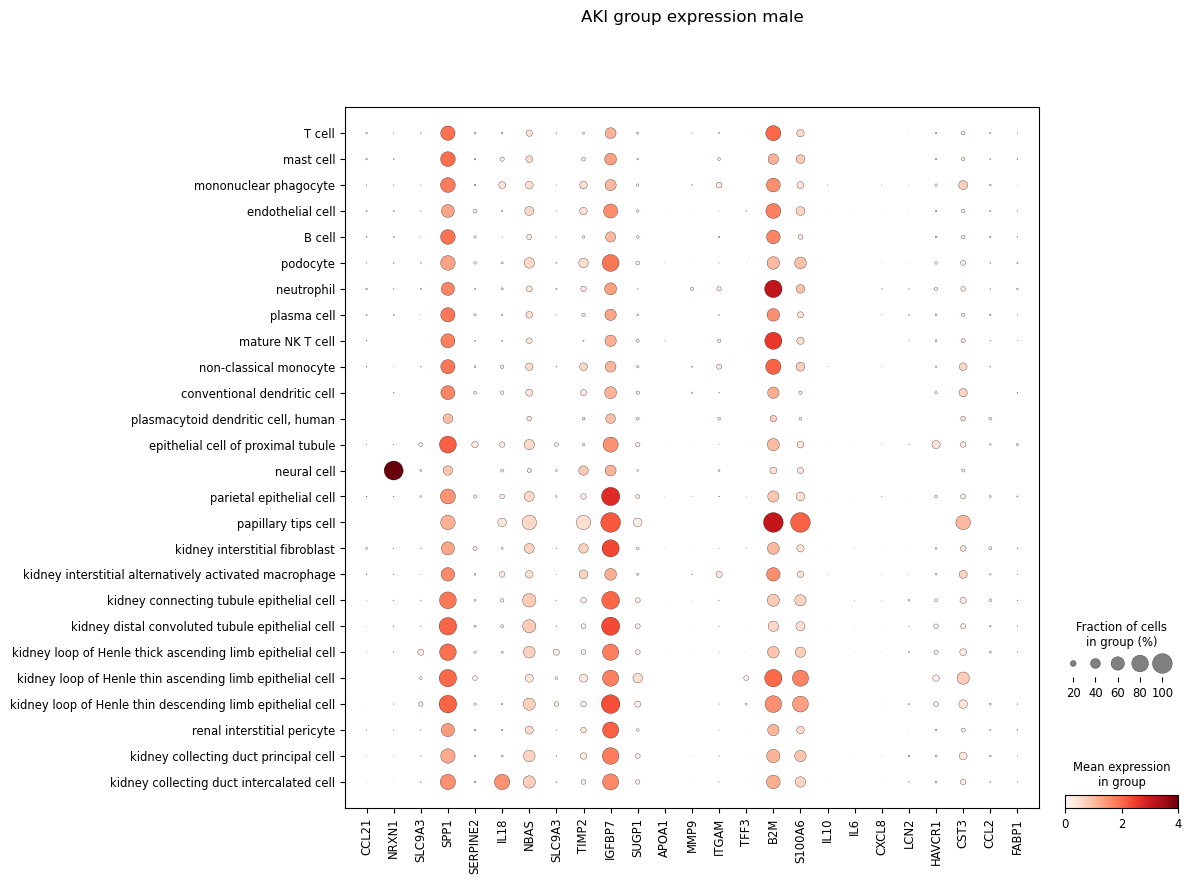

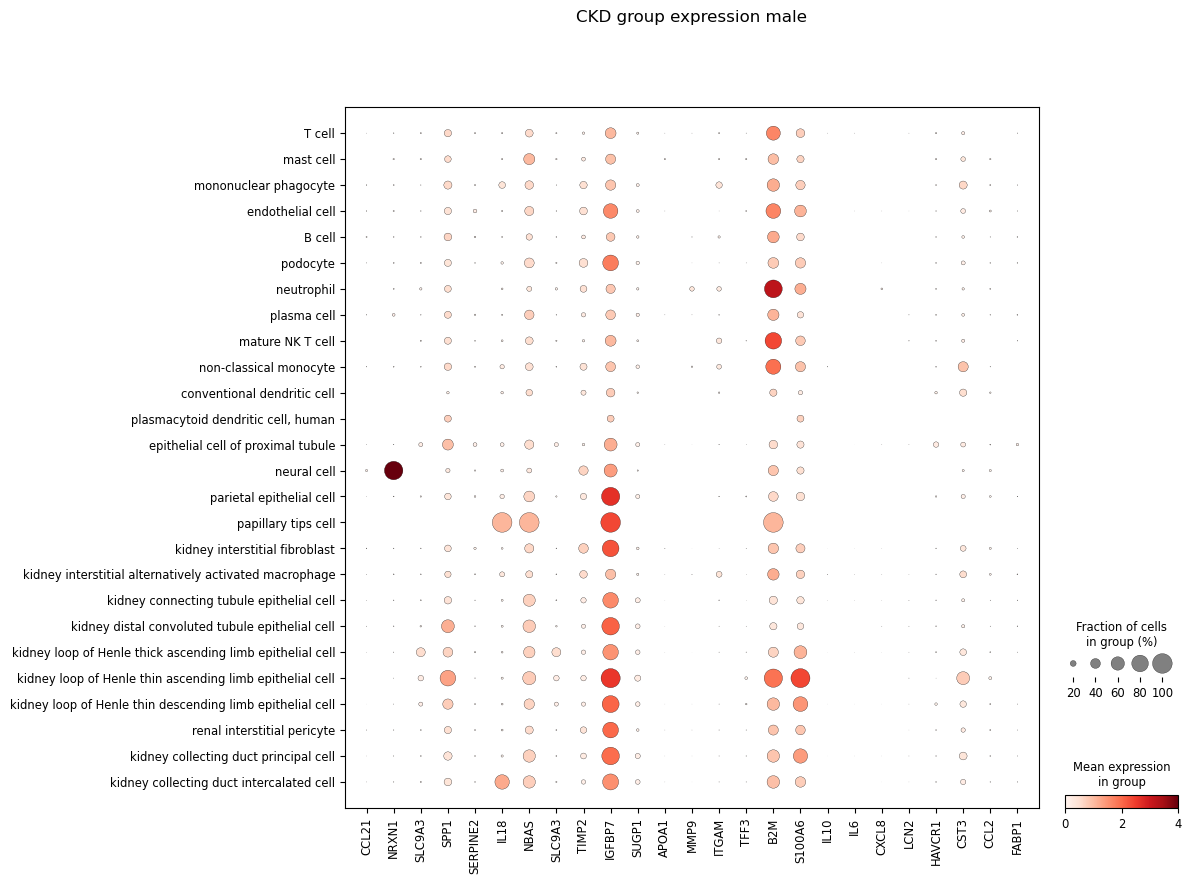

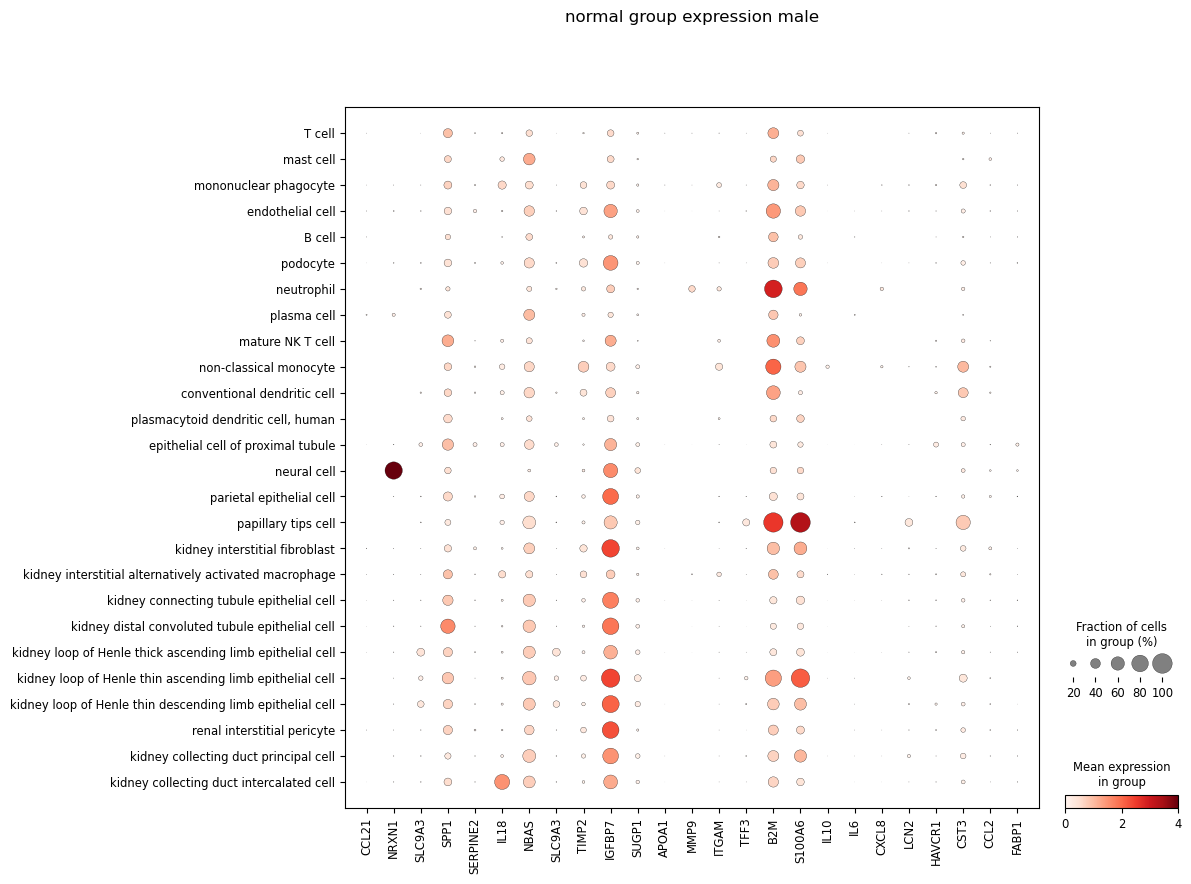

In [16]:
marker_genes=[        "CCL21",
    "NRXN1",
    "SLC9A3",
    "SPP1",
    "SERPINE2",
    "IL18",
    "NBAS",
    "SLC9A3",
    "TIMP2",
    "IGFBP7",
    "SUGP1",
    "APOA1",
    "MMP9",
    "ITGAM",
    "TFF3",
    "B2M",
    "S100A6",
    "IL10",
    "IL6",
    "CXCL8",
    "LCN2",
    "HAVCR1",
    "CST3",
    "CCL2",
    "FABP1"]

sc.pl.dotplot(
    adata_aki,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='AKI group expression male'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_ckd,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='CKD group expression male'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_normal,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='normal group expression male'
    # color map (matches your figure)
)

In [12]:
adata_m = KPMP_SN_raw[KPMP_SN_raw.obs["sex"] == "female"].copy()

adata_akim = adata_fem[adata_fem.obs["disease"] == "acute kidney failure"].copy()
adata_ckdm = adata_fem[adata_fem.obs["disease"] == "chronic kidney disease"].copy()
adata_normalm = adata_fem[adata_fem.obs["disease"] == "normal"].copy()

# Print sizes
print("AKI subset:", adata_akim.shape)      # cells x genes
print("CKD subset:", adata_ckdm.shape)
print("Normal subset:", adata_normalm.shape)


AKI subset: (41512, 36368)
CKD subset: (62983, 36368)
Normal subset: (58754, 36368)


This part is for the KPMP data only, the expression of marker genes for female across different cell types

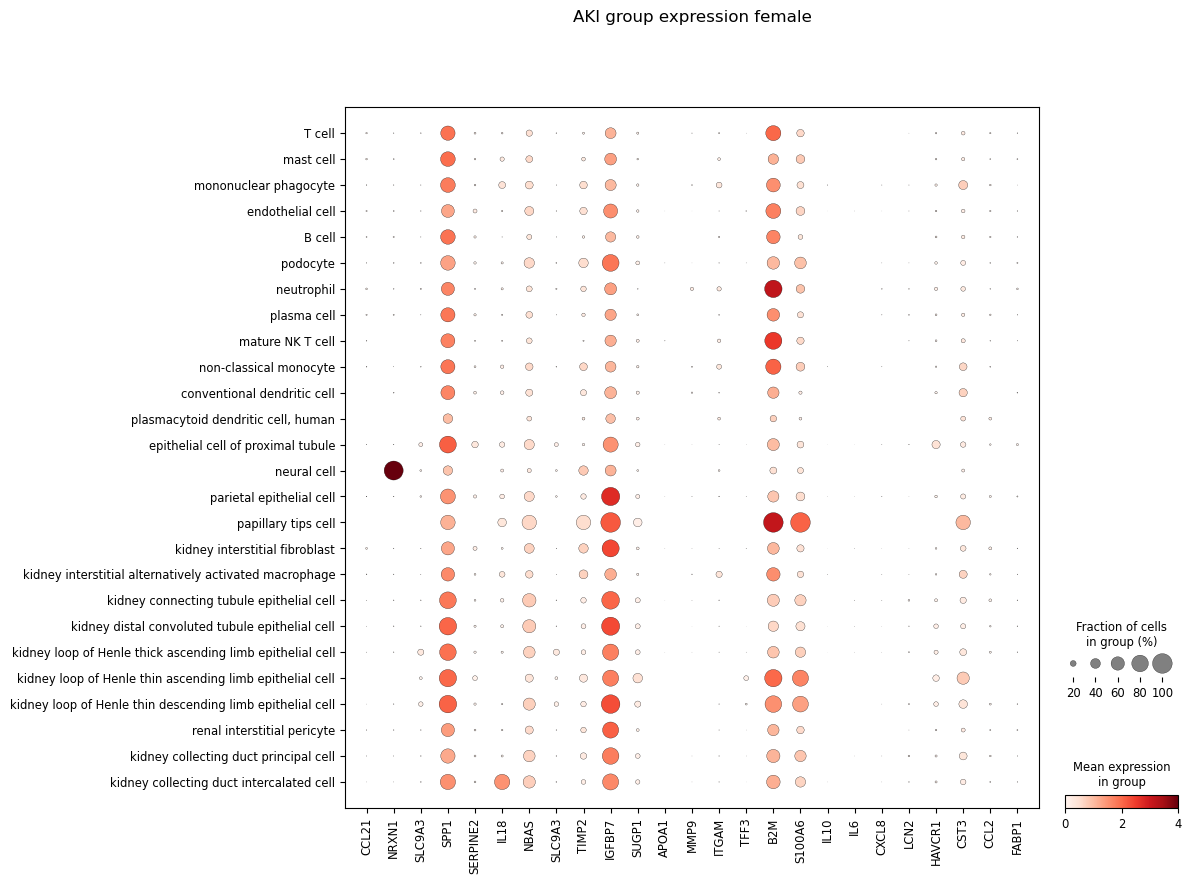

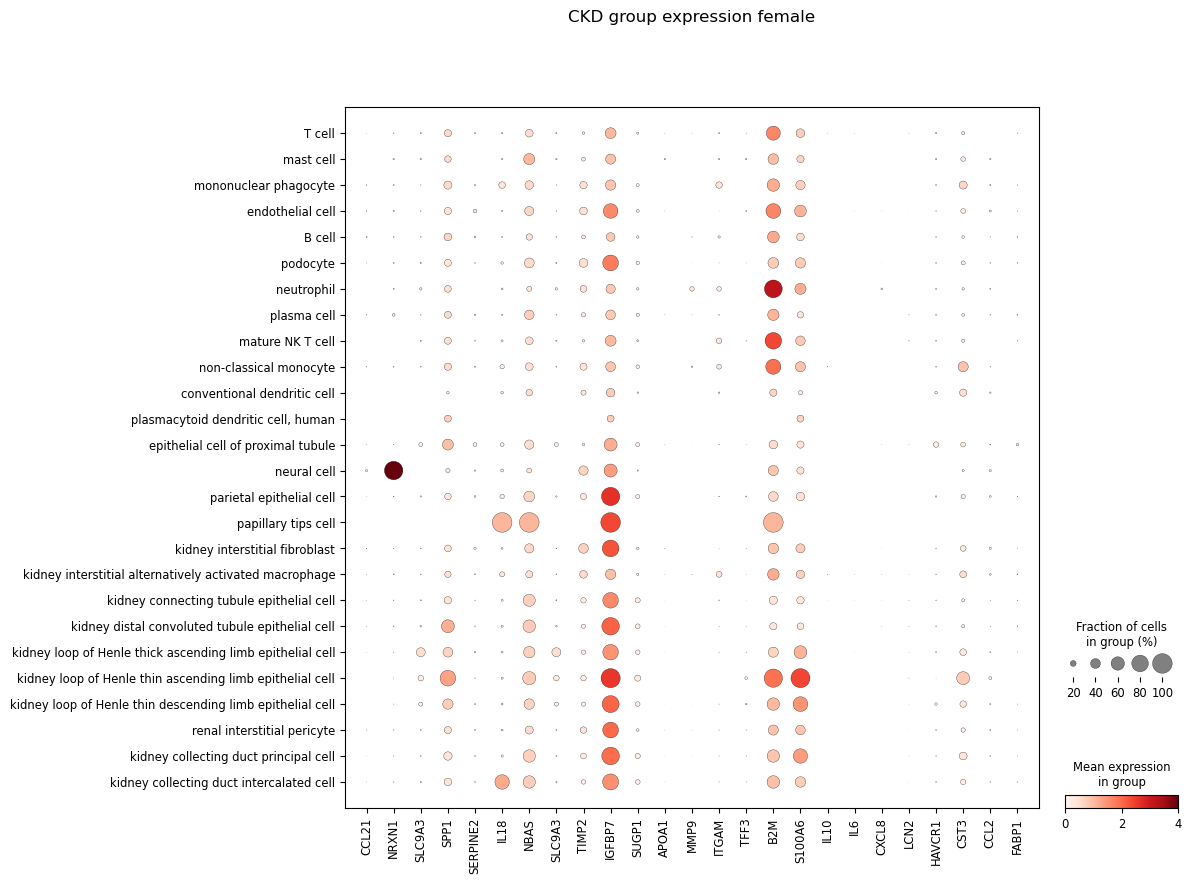

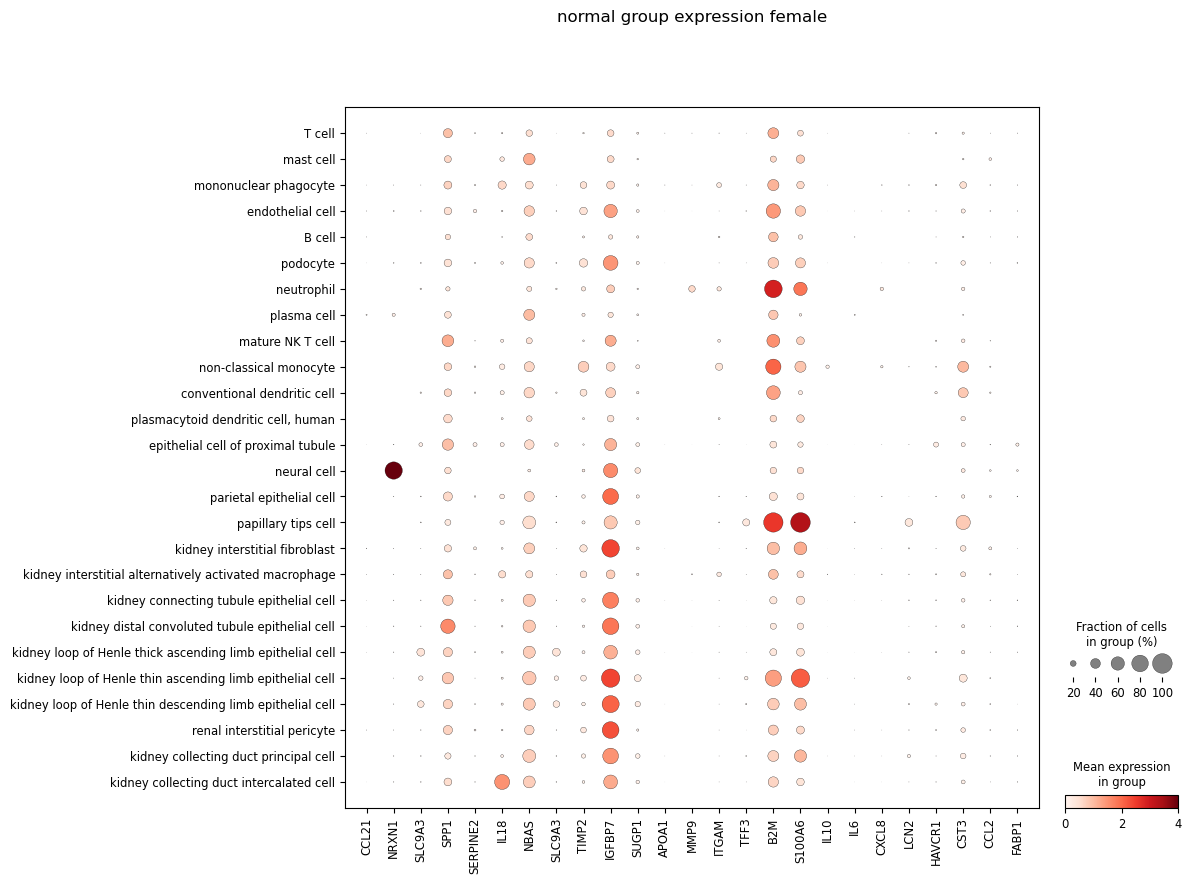

In [14]:
marker_genes=[        "CCL21",
    "NRXN1",
    "SLC9A3",
    "SPP1",
    "SERPINE2",
    "IL18",
    "NBAS",
    "SLC9A3",
    "TIMP2",
    "IGFBP7",
    "SUGP1",
    "APOA1",
    "MMP9",
    "ITGAM",
    "TFF3",
    "B2M",
    "S100A6",
    "IL10",
    "IL6",
    "CXCL8",
    "LCN2",
    "HAVCR1",
    "CST3",
    "CCL2",
    "FABP1"]

sc.pl.dotplot(
    adata_akim,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,
    vmax=4,
    title='AKI group expression female'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_ckdm,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,
    vmax=4,
    title='CKD group expression female'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_normalm,
    var_names=marker_genes,
    groupby="cell_type",         # minimum dot size
    cmap="Reds",
    use_raw=False,
    vmax=4,
    title='normal group expression female'
    # color map (matches your figure)
)

In [2]:
integrated_data=sc.read('/scratch/yongqunh_root/yongqunh0/wruopeng/HuBMAP_KPMP/kpmp_hubmap_combined_after_1e4_normalization_only_afterQC.h5ad')

In [3]:
print(integrated_data.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1009461054 stored elements and shape (832343, 35878)>
  Coords	Values
  (0, 44)	16.366613388061523
  (0, 74)	16.366613388061523
  (0, 678)	16.366613388061523
  (0, 1638)	16.366613388061523
  (0, 1949)	16.366613388061523
  (0, 2157)	16.366613388061523
  (0, 3179)	16.366613388061523
  (0, 3226)	16.366613388061523
  (0, 3594)	16.366613388061523
  (0, 4418)	16.366613388061523
  (0, 4873)	16.366613388061523
  (0, 5484)	16.366613388061523
  (0, 6447)	16.366613388061523
  (0, 6495)	16.366613388061523
  (0, 6581)	81.83306121826172
  (0, 6612)	16.366613388061523
  (0, 7172)	16.366613388061523
  (0, 7236)	16.366613388061523
  (0, 7714)	16.366613388061523
  (0, 7716)	16.366613388061523
  (0, 8081)	16.366613388061523
  (0, 8113)	16.366613388061523
  (0, 8120)	16.366613388061523
  (0, 8170)	49.09983825683594
  (0, 8206)	16.366613388061523
  :	:
  (832342, 35631)	2.567142963409424
  (832342, 35641)	1.283571481704712
  (832342, 35670)	2.56

In [4]:
sc.pp.log1p(integrated_data)

In [5]:
integrated_data.var_names=integrated_data.var['gene_name']

/home/wruopeng/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:845: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [5]:
print(integrated_data.X)

<Compressed Sparse Row sparse matrix of dtype 'float32'
	with 1009461054 stored elements and shape (832343, 35878)>
  Coords	Values
  (0, 44)	2.8545496463775635
  (0, 74)	2.8545496463775635
  (0, 678)	2.8545496463775635
  (0, 1638)	2.8545496463775635
  (0, 1949)	2.8545496463775635
  (0, 2157)	2.8545496463775635
  (0, 3179)	2.8545496463775635
  (0, 3226)	2.8545496463775635
  (0, 3594)	2.8545496463775635
  (0, 4418)	2.8545496463775635
  (0, 4873)	2.8545496463775635
  (0, 5484)	2.8545496463775635
  (0, 6447)	2.8545496463775635
  (0, 6495)	2.8545496463775635
  (0, 6581)	4.416827201843262
  (0, 6612)	2.8545496463775635
  (0, 7172)	2.8545496463775635
  (0, 7236)	2.8545496463775635
  (0, 7714)	2.8545496463775635
  (0, 7716)	2.8545496463775635
  (0, 8081)	2.8545496463775635
  (0, 8113)	2.8545496463775635
  (0, 8120)	2.8545496463775635
  (0, 8170)	3.914017677307129
  (0, 8206)	2.8545496463775635
  :	:
  (832342, 35631)	1.2717649936676025
  (832342, 35641)	0.82574063539505
  (832342, 35670)	1.27

In [6]:
adata_aki_all_hubmap_kpmp = integrated_data[integrated_data.obs["disease"] == "acute kidney failure"].copy()
adata_ckd_all_hubmap_kpmp = integrated_data[integrated_data.obs["disease"] == "chronic kidney disease"].copy()
adata_normal_all_hubmap_kpmp = integrated_data[integrated_data.obs["disease"] == "normal"].copy()

# Print sizes
print("AKI subset:", adata_aki_all_hubmap_kpmp.shape)      # cells x genes
print("CKD subset:", adata_ckd_all_hubmap_kpmp.shape)
print("Normal subset:", adata_normal_all_hubmap_kpmp.shape)

AKI subset: (54549, 35878)
CKD subset: (127996, 35878)
Normal subset: (649798, 35878)


This part is for the combined data of kpmp and hubmap, the expression of marker genes for male and female(all population) across different cell types

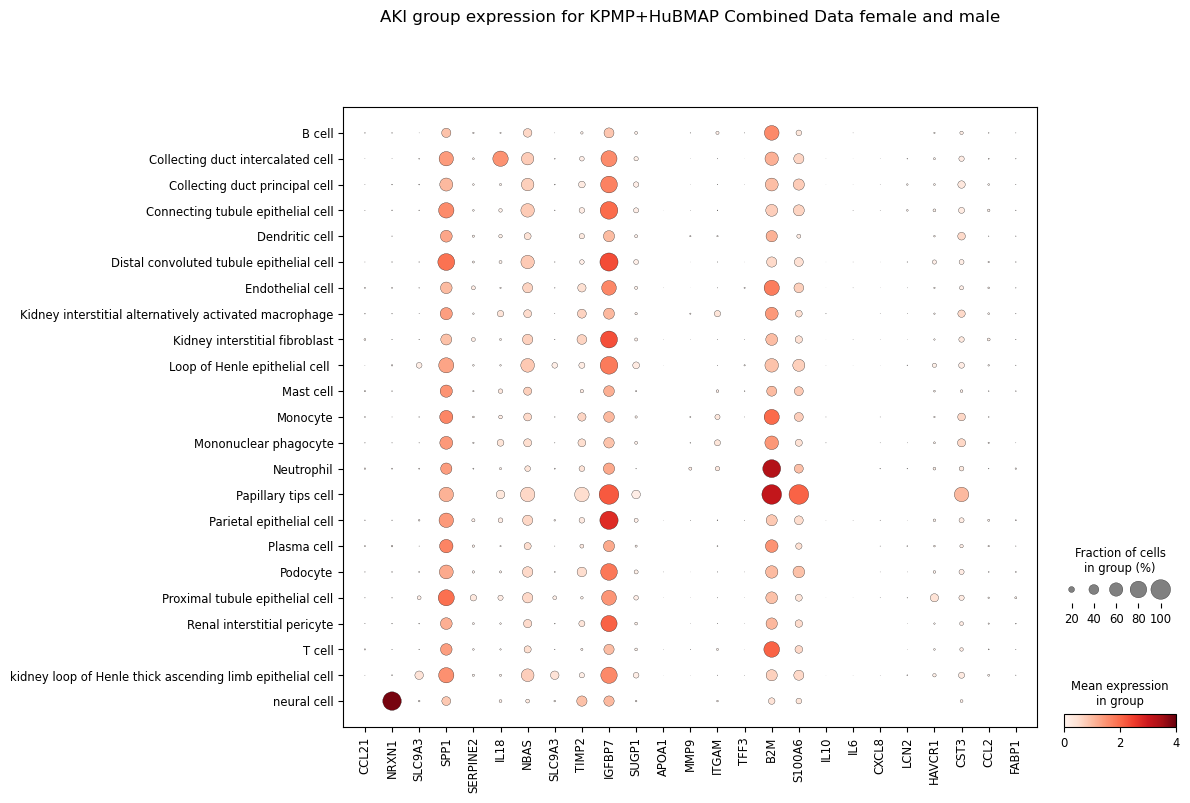

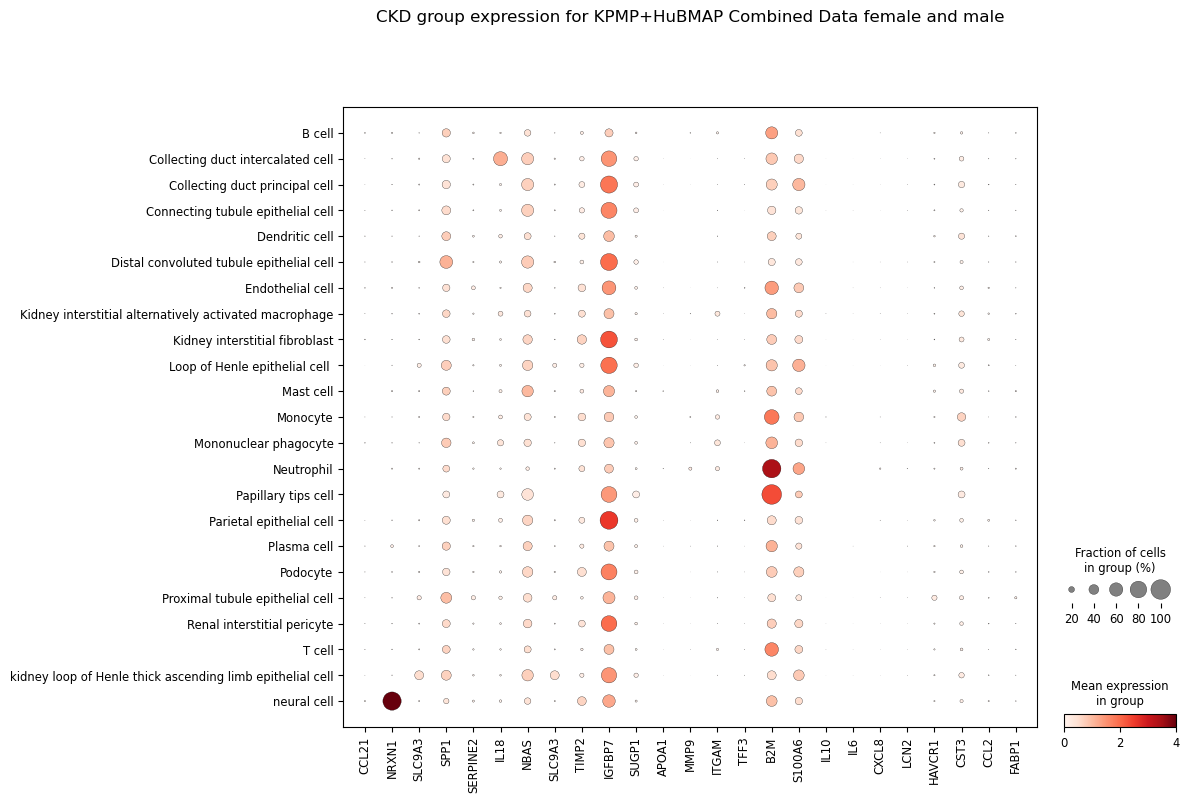

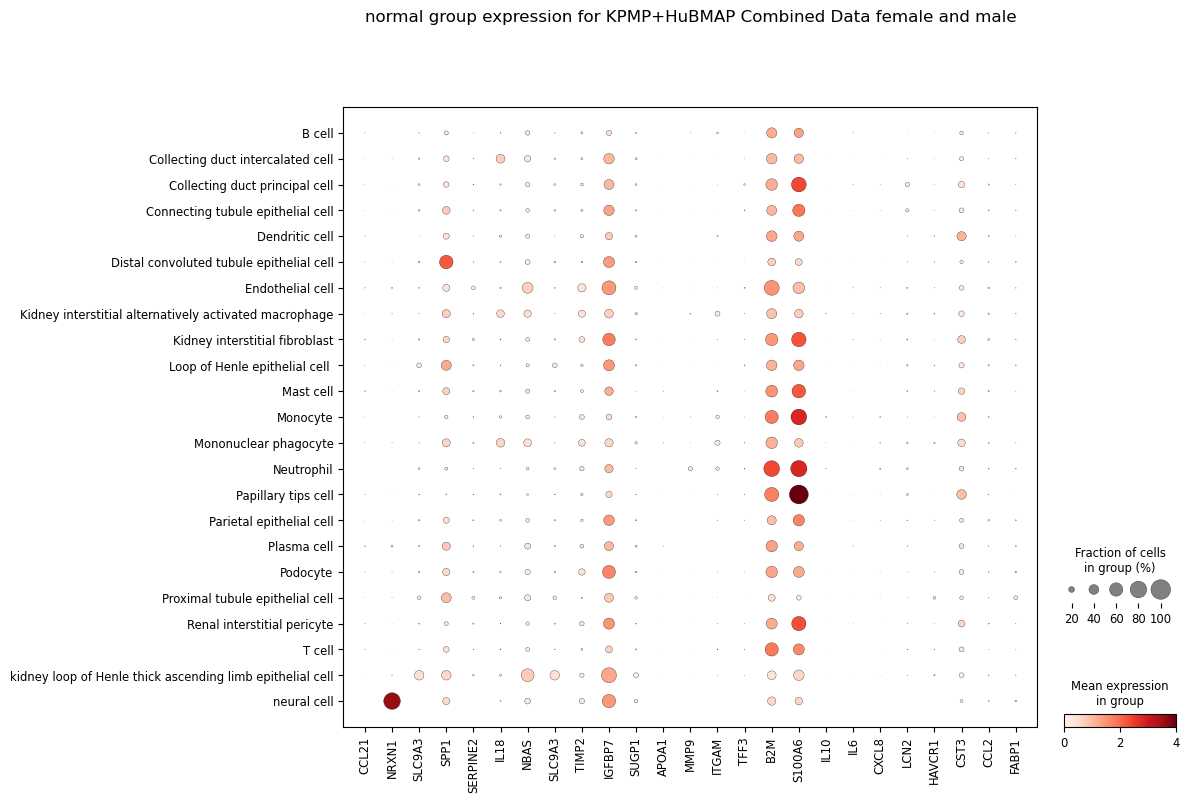

In [7]:
marker_genes=[        "CCL21",
    "NRXN1",
    "SLC9A3",
    "SPP1",
    "SERPINE2",
    "IL18",
    "NBAS",
    "SLC9A3",
    "TIMP2",
    "IGFBP7",
    "SUGP1",
    "APOA1",
    "MMP9",
    "ITGAM",
    "TFF3",
    "B2M",
    "S100A6",
    "IL10",
    "IL6",
    "CXCL8",
    "LCN2",
    "HAVCR1",
    "CST3",
    "CCL2",
    "FABP1"]

sc.pl.dotplot(
    adata_aki_all_hubmap_kpmp,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='AKI group expression for KPMP+HuBMAP Combined Data female and male'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_ckd_all_hubmap_kpmp,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='CKD group expression for KPMP+HuBMAP Combined Data female and male'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_normal_all_hubmap_kpmp,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='normal group expression for KPMP+HuBMAP Combined Data female and male'
    # color map (matches your figure)
)

In [9]:
integrated_data_female_only = integrated_data[integrated_data.obs["sex"] == "female"].copy()

adata_aki_all_hubmap_kpmp_female = integrated_data_female_only[integrated_data_female_only.obs["disease"] == "acute kidney failure"].copy()
adata_ckd_all_hubmap_kpmp_female = integrated_data_female_only[integrated_data_female_only.obs["disease"] == "chronic kidney disease"].copy()
adata_normal_all_hubmap_kpmp_female = integrated_data_female_only[integrated_data_female_only.obs["disease"] == "normal"].copy()

# Print sizes
print("AKI subset:", adata_aki_all_hubmap_kpmp_female.shape)      # cells x genes
print("CKD subset:", adata_ckd_all_hubmap_kpmp_female.shape)
print("Normal subset:", adata_normal_all_hubmap_kpmp_female.shape)

AKI subset: (13037, 35878)
CKD subset: (65013, 35878)
Normal subset: (63690, 35878)


This part is for the combined data of kpmp and hubmap, the expression of marker genes for female only across different cell types

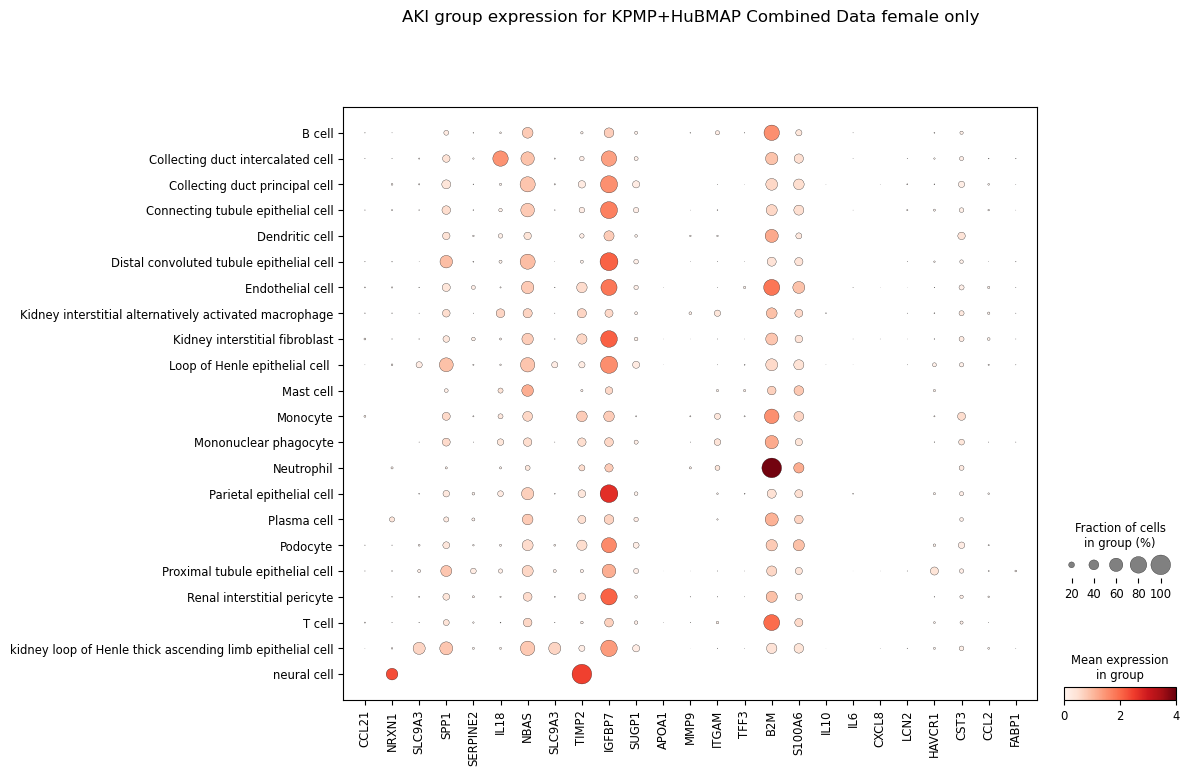

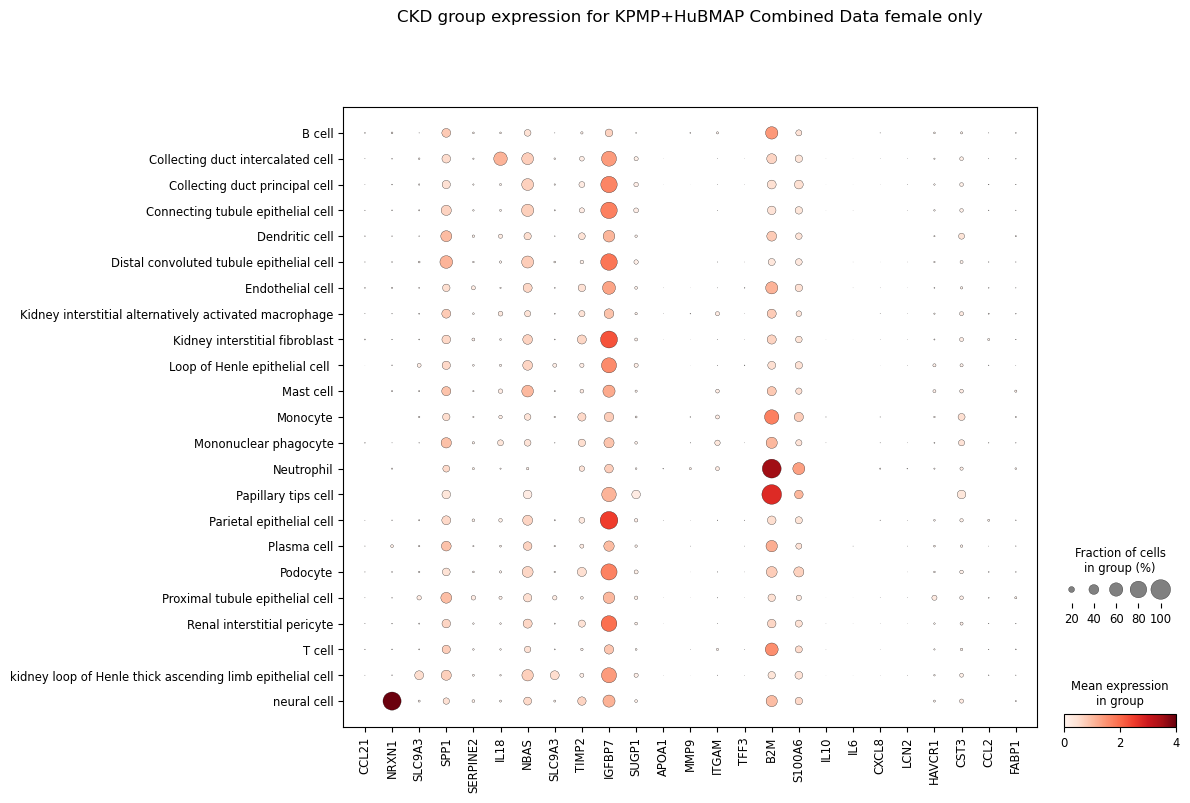

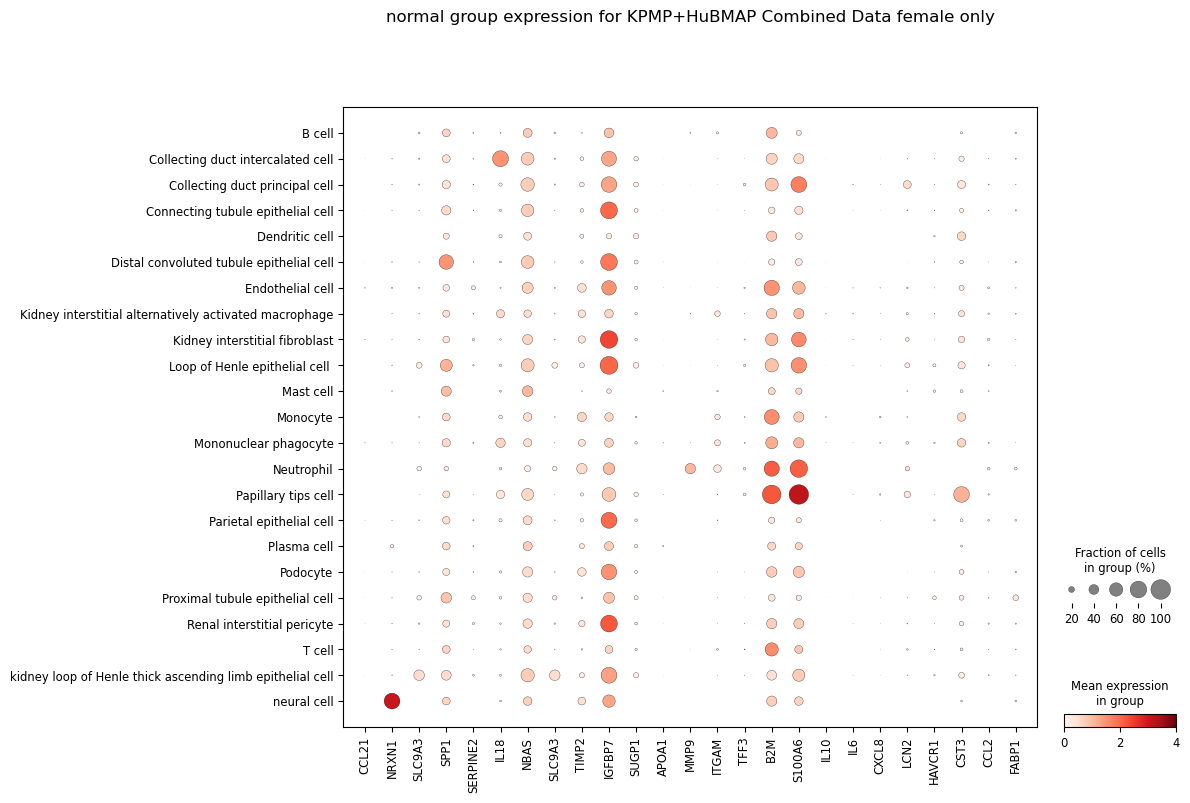

In [11]:
marker_genes=[        "CCL21",
    "NRXN1",
    "SLC9A3",
    "SPP1",
    "SERPINE2",
    "IL18",
    "NBAS",
    "SLC9A3",
    "TIMP2",
    "IGFBP7",
    "SUGP1",
    "APOA1",
    "MMP9",
    "ITGAM",
    "TFF3",
    "B2M",
    "S100A6",
    "IL10",
    "IL6",
    "CXCL8",
    "LCN2",
    "HAVCR1",
    "CST3",
    "CCL2",
    "FABP1"]

sc.pl.dotplot(
    adata_aki_all_hubmap_kpmp_female,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='AKI group expression for KPMP+HuBMAP Combined Data female only'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_ckd_all_hubmap_kpmp_female,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='CKD group expression for KPMP+HuBMAP Combined Data female only'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_normal_all_hubmap_kpmp_female,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='normal group expression for KPMP+HuBMAP Combined Data female only'
    # color map (matches your figure)
)

In [ ]:
integrated_data_male_only = integrated_data[integrated_data.obs["sex"] == "male"].copy()

adata_aki_all_hubmap_kpmp_male = integrated_data_male_only[integrated_data_male_only.obs["disease"] == "acute kidney failure"].copy()
adata_ckd_all_hubmap_kpmp_male = integrated_data_male_only[integrated_data_male_only.obs["disease"] == "chronic kidney disease"].copy()
adata_normal_all_hubmap_kpmp_male = integrated_data_male_only[integrated_data_male_only.obs["disease"] == "normal"].copy()

# Print sizes
print("AKI subset:", adata_aki_all_hubmap_kpmp_male.shape)      # cells x genes
print("CKD subset:", adata_ckd_all_hubmap_kpmp_male.shape)
print("Normal subset:", adata_normal_all_hubmap_kpmp_male.shape)

AKI subset: (41512, 35878)
CKD subset: (62983, 35878)
Normal subset: (58754, 35878)


This part is for the combined data of kpmp and hubmap, the expression of marker genes for male only across different cell types

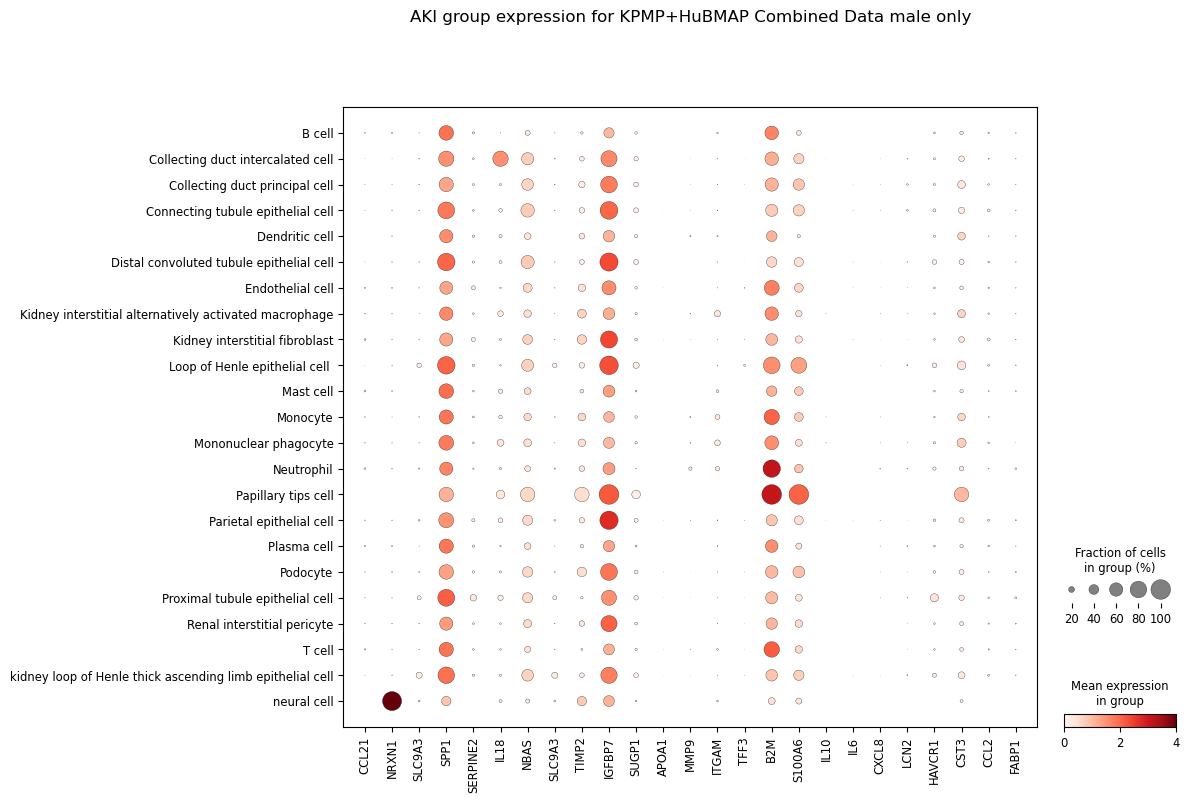

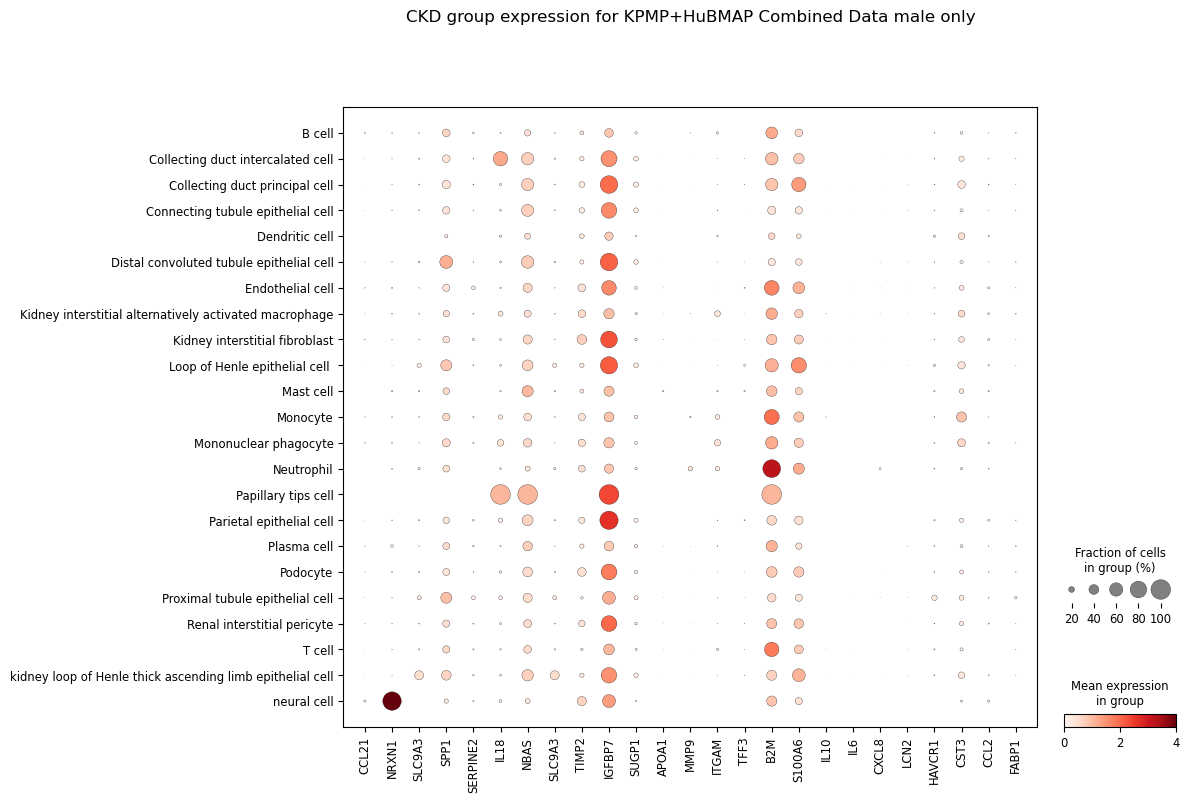

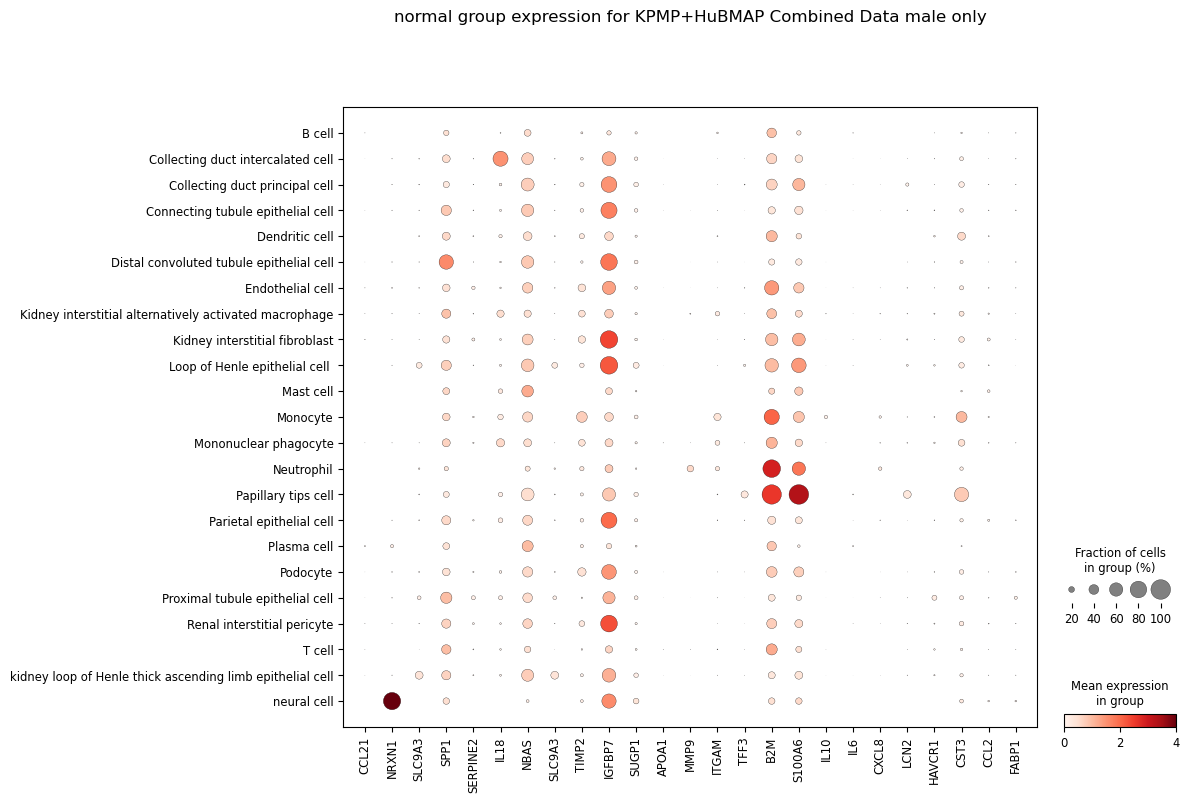

In [13]:
marker_genes=[        "CCL21",
    "NRXN1",
    "SLC9A3",
    "SPP1",
    "SERPINE2",
    "IL18",
    "NBAS",
    "SLC9A3",
    "TIMP2",
    "IGFBP7",
    "SUGP1",
    "APOA1",
    "MMP9",
    "ITGAM",
    "TFF3",
    "B2M",
    "S100A6",
    "IL10",
    "IL6",
    "CXCL8",
    "LCN2",
    "HAVCR1",
    "CST3",
    "CCL2",
    "FABP1"]

sc.pl.dotplot(
    adata_aki_all_hubmap_kpmp_male,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='AKI group expression for KPMP+HuBMAP Combined Data male only'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_ckd_all_hubmap_kpmp_male,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='CKD group expression for KPMP+HuBMAP Combined Data male only'
    # color map (matches your figure)
)
sc.pl.dotplot(
    adata_normal_all_hubmap_kpmp_male,
    var_names=marker_genes,
    groupby="general_cl_label",         # minimum dot size
    cmap="Reds",
    use_raw=False,vmax=4,
    title='normal group expression for KPMP+HuBMAP Combined Data male only'
    # color map (matches your figure)
)